<a href="https://colab.research.google.com/github/WellingtonLandim/wellingtonlandim.github.io/blob/main/Analise%20de%20Cura/Analise_de_Cura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interp1d


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive_path = '/content/drive/MyDrive/MAN/Curvas de Temperatura'

In [136]:

# Carregar os dados do arquivo
file_path = drive_path + '/Cura Sorvetão.txt'
file_name = file_path.split('/')[-1].split('.')[0]
data = pd.read_csv(file_path, delimiter='\t')
file_name

'Cura Sorvetão'

In [137]:
data.head()

,Segundos,Porta a 220°C,Porta a 200°C,Porta a 190°C
0,"0,00","31,3","34,8","29,5"
1,"0,05","31,3","34,8","29,5"
2,"0,10","31,3","34,8","29,5"
3,"0,15","31,4","34,9","29,6"
4,"0,20","31,4","34,9","29,6"


In [138]:
# Converter as colunas de temperatura para valores numéricos
data['Porta a 220°C'] = pd.to_numeric(data['Porta a 220°C'].str.replace(',', '.'))
data['Porta a 200°C'] = pd.to_numeric(data['Porta a 200°C'].str.replace(',', '.'))
data['Porta a 190°C'] = pd.to_numeric(data['Porta a 190°C'].str.replace(',', '.'))
data['Segundos'] = pd.to_numeric(data['Segundos'].str.replace(',', '.'))

In [112]:
# prompt: adicione uma nova colunacom numeros inteiros originado da multiplicação   da coluna Segundos por 100

data['Tempo (m)'] = data['Segundos'] * 100/60
data.head()

,Segundos,Porta a 220°C,Porta a 200°C,Porta a 190°C,Tempo (m)
0,0.00,31.3,34.8,29.5,0.000000
1,0.05,31.3,34.8,29.5,0.083333
2,0.10,31.3,34.8,29.5,0.166667
3,0.15,31.4,34.9,29.6,0.250000
4,0.20,31.4,34.9,29.6,0.333333


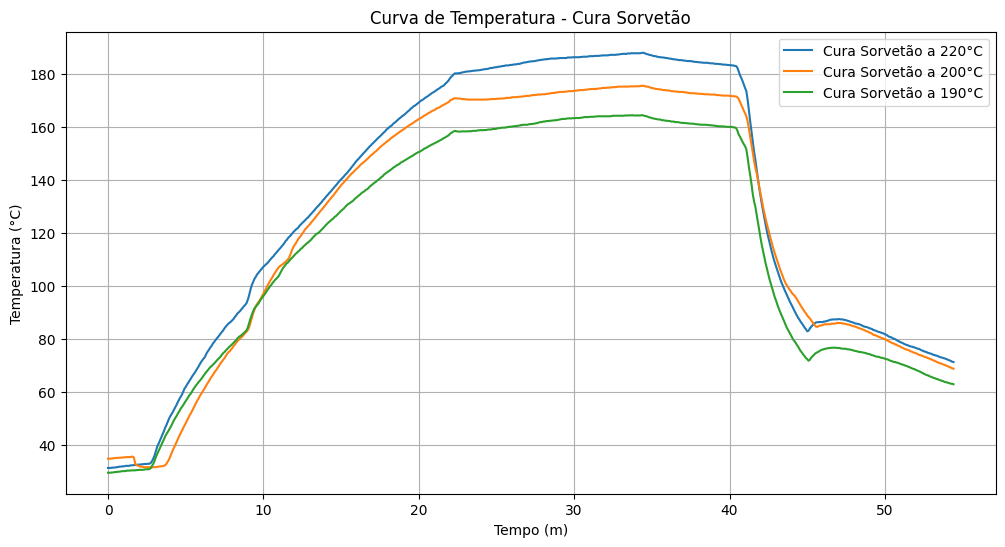

In [113]:
# Plotar as curvas de temperatura
plt.figure(figsize=(12, 6))
plt.plot(data['Tempo (m)'], data['Porta a 220°C'], label=f'{file_name} a 220°C')
plt.plot(data['Tempo (m)'], data['Porta a 200°C'], label=f'{file_name} a 200°C')
plt.plot(data['Tempo (m)'], data['Porta a 190°C'], label=f'{file_name} a 190°C')
plt.xlabel('Tempo (m)')
plt.ylabel('Temperatura (°C)')
plt.title(f'Curva de Temperatura - {file_name}')
plt.legend()
plt.grid(True)

In [114]:
data.head()


,Segundos,Porta a 220°C,Porta a 200°C,Porta a 190°C,Tempo (m)
0,0.00,31.3,34.8,29.5,0.000000
1,0.05,31.3,34.8,29.5,0.083333
2,0.10,31.3,34.8,29.5,0.166667
3,0.15,31.4,34.9,29.6,0.250000
4,0.20,31.4,34.9,29.6,0.333333


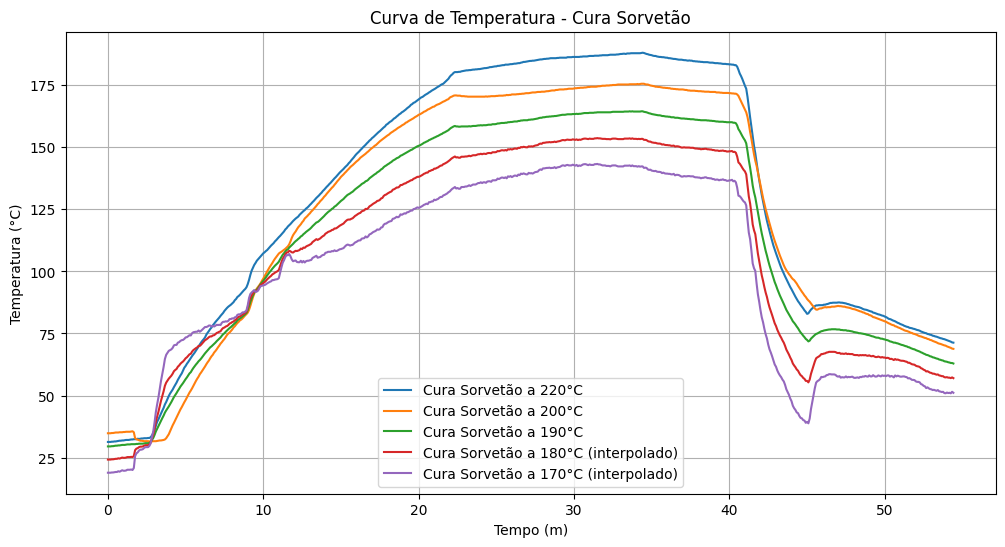

In [115]:
# prompt: temos tres curvas para um processo que está atrelado á uma variavel fixa, que é a temperatura interna da estufa. com uma temperatura de 220ºC temos a curva da coluna "Porta a 220°C". Para uma temperatura da estufa de 200°C a curva real está na coluna "Porta a 200°C" e para uma temperatura de 190°C temos a curva real que está na coluna "Porta a 190°C. Preciso de uma curva derivada desse modelo para gerar uma nova curva com a alteração do parâmetro de temperatura da estufa, a exemplo: quando a estufa estiver em 180°C, qual será a temperatura da porta?


# Criar um modelo de interpolação para cada temperatura
temps = [190, 200, 220]
models = []
for temp in temps:
    col_name = f'Porta a {temp}°C'
    model = interp1d(data['Tempo (m)'], data[col_name], kind='cubic') #cubic interpolation
    models.append((temp, model))


# Temperatura alvo
target_temp = 180

# Tempo para predição (use o mesmo tempo que os dados originais)
times = data['Tempo (m)']


# Interpolação para a nova temperatura
# Note que aqui estamos interpolando as funções de interpolação
# para gerar a curva a 180 graus
# The original code was trying to interpolate a 1D function with a 2D array for y.
# This is incorrect. Instead, we need to interpolate each time point separately.
porta_180 = []
for time in times:
    temp_interp_model = interp1d([model[0] for model in models],
                                 [model[1](time) for model in models],
                                 kind='linear',
                                 bounds_error=False,
                                 fill_value="extrapolate")
    porta_180.append(temp_interp_model(target_temp))

# Convert porta_180 to a NumPy array
porta_180 = np.array(porta_180)

target_temp_min = 170

porta_170 = []
for time in times:
    temp_interp_model = interp1d([model[0] for model in models],
                                 [model[1](time) for model in models],
                                 kind='linear',
                                 bounds_error=False,
                                 fill_value="extrapolate")
    porta_170.append(temp_interp_model(target_temp_min))

# Convert porta_180 to a NumPy array
porta_170 = np.array(porta_170)

# Plotar a nova curva
plt.figure(figsize=(12, 6))
plt.plot(data['Tempo (m)'], data['Porta a 220°C'], label=f'{file_name} a 220°C')
plt.plot(data['Tempo (m)'], data['Porta a 200°C'], label=f'{file_name} a 200°C')
plt.plot(data['Tempo (m)'], data['Porta a 190°C'], label=f'{file_name} a 190°C')
plt.plot(times, porta_180, label=f'{file_name} a {target_temp}°C (interpolado)')
plt.plot(times, porta_170, label=f'{file_name} a {target_temp_min}°C (interpolado)')
plt.xlabel('Tempo (m)')
plt.ylabel('Temperatura (°C)')
plt.title(f'Curva de Temperatura - {file_name}')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
# prompt: make a dataframe with times and porta_180

# Create a DataFrame with 'times' and 'porta_180'
df_interp = pd.DataFrame({'Tempo (m)': times, 'Porta a 180°C': porta_180, 'Porta a 170°C': porta_170})

df_interp

,Tempo (m),Porta a 180°C,Porta a 170°C
0,0.000000,24.2,18.9
1,0.083333,24.2,18.9
2,0.166667,24.2,18.9
3,0.250000,24.3,19.0
4,0.333333,24.3,19.0
...,...,...,...
649,54.083333,57.2,51.0
650,54.166667,57.2,51.1
651,54.250000,57.0,50.9
652,54.333333,57.3,51.5


In [117]:
# Juntar o dataset derivado com o dataset original
data = pd.merge(data, df_interp, on='Tempo (m)', how='left')

data.head()

,Segundos,Porta a 220°C,Porta a 200°C,Porta a 190°C,Tempo (m),Porta a 180°C,Porta a 170°C
0,0.00,31.3,34.8,29.5,0.000000,24.2,18.9
1,0.05,31.3,34.8,29.5,0.083333,24.2,18.9
2,0.10,31.3,34.8,29.5,0.166667,24.2,18.9
3,0.15,31.4,34.9,29.6,0.250000,24.3,19.0
4,0.20,31.4,34.9,29.6,0.333333,24.3,19.0


In [119]:
Temperatura_Minima_substrato = 140

# Encontrar os tempos em que a temperatura excede 160°C para cada curva
tempos_220 = len(data.loc[data['Porta a 220°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_200 = len(data.loc[data['Porta a 200°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_190 = len(data.loc[data['Porta a 190°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_deriv = len(data.loc[data['Porta a 180°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_deriv_min = len(data.loc[data['Porta a 170°C'] > Temperatura_Minima_substrato, 'Segundos'])*5

print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de 220°C: {tempos_220/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de 200°C: {tempos_200/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de 190°C: {tempos_200/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de {target_temp}°C: {tempos_deriv/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de {target_temp_min}°C: {tempos_deriv_min/60}")

Número de tempos acima de 140°C para a curva de 220°C: 26.916666666666668
Número de tempos acima de 140°C para a curva de 200°C: 26.5
Número de tempos acima de 140°C para a curva de 190°C: 26.5
Número de tempos acima de 140°C para a curva de 180°C: 20.416666666666668
Número de tempos acima de 140°C para a curva de 170°C: 8.083333333333334


In [120]:
# prompt: para as variaveis tempos_220 e tempos_200, crie uma tabela onde mostre quanto tempo cada variavel ficou acima da temperatura, varie a temperatura de 120 até 210 com intervalo de 5 graus

# Criar um DataFrame vazio para armazenar os resultados
results = pd.DataFrame(columns=['Temperatura', 'Tempo_220', 'Tempo_200', 'Tempo_180'])

# Iterar pelas temperaturas de 120 a 210 com intervalo de 5
for temp in range(120, 200, 1):
  # Calcular o tempo acima da temperatura para cada curva
  tempo_220 = len(data.loc[data['Porta a 220°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_200 = len(data.loc[data['Porta a 200°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_190 = len(data.loc[data['Porta a 190°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_der = len(data.loc[data['Porta a 180°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_der_min = len(data.loc[data['Porta a 170°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  # Adicionar os resultados ao DataFrame
  results = pd.concat([results, pd.DataFrame({'Temperatura': [temp], 'Tempo_220': [tempo_220], 'Tempo_200': [tempo_200], 'Tempo_190': [tempo_190], 'Tempo_deriv': [tempo_der], 'Tempo_deriv_min': [tempo_der_min]})], ignore_index=True)

# Exibir o DataFrame
results

<ipython-input-120-f9c631a7f2e2>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Temperatura': [temp], 'Tempo_220': [tempo_220], 'Tempo_200': [tempo_200], 'Tempo_190': [tempo_190], 'Tempo_deriv': [tempo_der], 'Tempo_deriv_min': [tempo_der_min]})], ignore_index=True)


,Temperatura,Tempo_220,Tempo_200,Tempo_180,Tempo_190,Tempo_deriv,Tempo_deriv_min
0,120,30.583333,30.000000,NaN,28.416667,26.166667,23.166667
1,121,30.333333,29.916667,NaN,28.166667,25.833333,22.833333
2,122,30.166667,29.666667,NaN,28.000000,25.583333,22.416667
3,123,29.916667,29.500000,NaN,27.833333,25.416667,22.166667
4,124,29.750000,29.333333,NaN,27.583333,25.083333,21.750000
...,...,...,...,...,...,...,...
75,195,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
76,196,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
77,197,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
78,198,0.000000,0.000000,NaN,0.000000,0.000000,0.000000


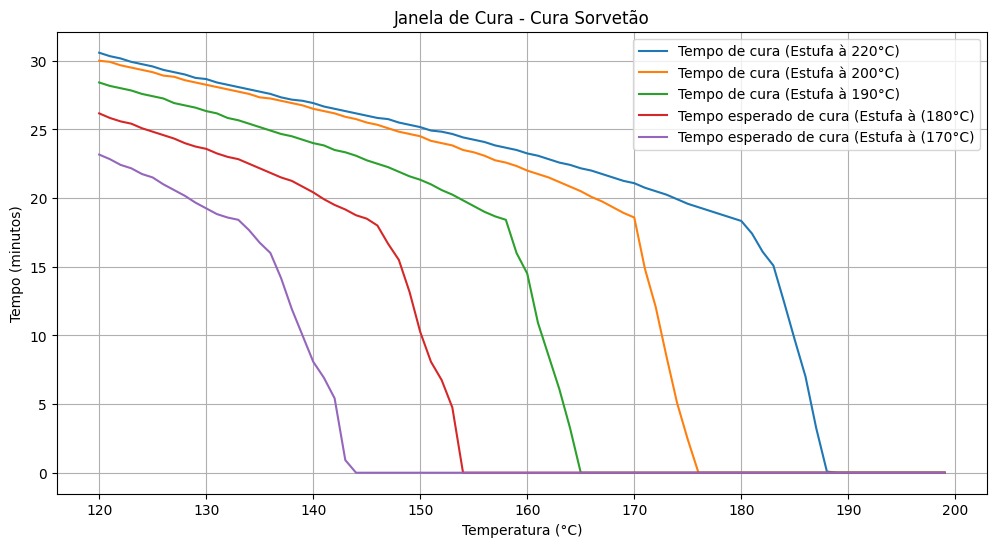

In [121]:
# Plotar os resultados em um único gráfico
plt.figure(figsize=(12, 6))
plt.plot(results['Temperatura'], results['Tempo_220'], label='Tempo de cura (Estufa à 220°C)')
plt.plot(results['Temperatura'], results['Tempo_200'], label='Tempo de cura (Estufa à 200°C)')
plt.plot(results['Temperatura'], results['Tempo_190'], label='Tempo de cura (Estufa à 190°C)')
plt.plot(results['Temperatura'], results['Tempo_deriv'], label=f'Tempo esperado de cura (Estufa à ({target_temp}°C)')
plt.plot(results['Temperatura'], results['Tempo_deriv_min'], label=f'Tempo esperado de cura (Estufa à ({target_temp_min}°C)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Tempo (minutos)')
plt.title(f'Janela de Cura - {file_name}')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
data.head()


,Segundos,Porta a 220°C,Porta a 200°C,Porta a 180°C
0,0.00,31.3,34.8,40.05
1,0.05,31.3,34.8,40.05
2,0.10,31.3,34.8,40.05
3,0.15,31.4,34.9,40.15
4,0.20,31.4,34.9,40.15


# Curva de Cura da Porta

In [51]:
# Carregar os dados do arquivo
file_path_porta = drive_path + '/Curva Porta.txt'
file_name_porta = file_path_porta.split('/')[-1].split('.')[0]
data_porta = pd.read_csv(file_path_porta, delimiter='\t')
file_name_porta

'Curva Porta'

In [52]:
# Converter as colunas de temperatura para valores numéricos
data_porta['Porta a 220°C'] = pd.to_numeric(data_porta['Porta a 220°C'].str.replace(',', '.'))
data_porta['Porta a 200°C'] = pd.to_numeric(data_porta['Porta a 200°C'].str.replace(',', '.'))
data_porta['Porta a 190°C'] = pd.to_numeric(data_porta['Porta a 190°C'].str.replace(',', '.'))
data_porta['Segundos'] = pd.to_numeric(data_porta['Segundos'].str.replace(',', '.'))

In [53]:

data_porta['Tempo (m)'] = data_porta['Segundos'] * 100/60
data_porta.head()

,Segundos,Porta a 200°C,Porta a 220°C,Porta a 190°C,Tempo (m)
0,0.00,41.1,41.3,29.9,0.000000
1,0.05,41.1,41.3,30.1,0.083333
2,0.10,41.3,41.4,30.3,0.166667
3,0.15,41.3,41.4,30.5,0.250000
4,0.20,41.3,41.4,30.8,0.333333


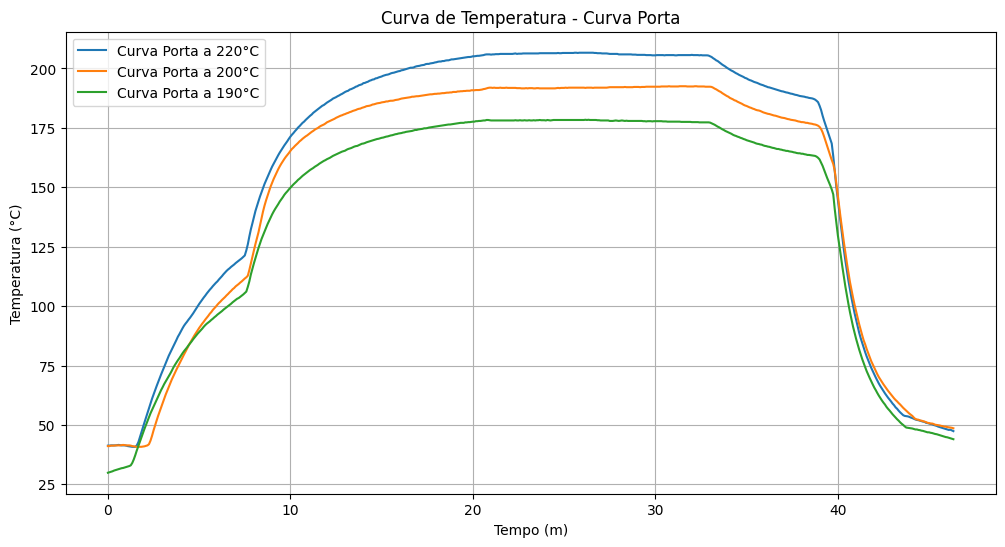

In [54]:
# Plotar as curvas de temperatura
plt.figure(figsize=(12, 6))
plt.plot(data_porta['Tempo (m)'], data_porta['Porta a 220°C'], label=f'{file_name_porta} a 220°C')
plt.plot(data_porta['Tempo (m)'], data_porta['Porta a 200°C'], label=f'{file_name_porta} a 200°C')
plt.plot(data_porta['Tempo (m)'], data_porta['Porta a 190°C'], label=f'{file_name_porta} a 190°C')
plt.xlabel('Tempo (m)')
plt.ylabel('Temperatura (°C)')
plt.title(f'Curva de Temperatura - {file_name_porta}')
plt.legend()
plt.grid(True)

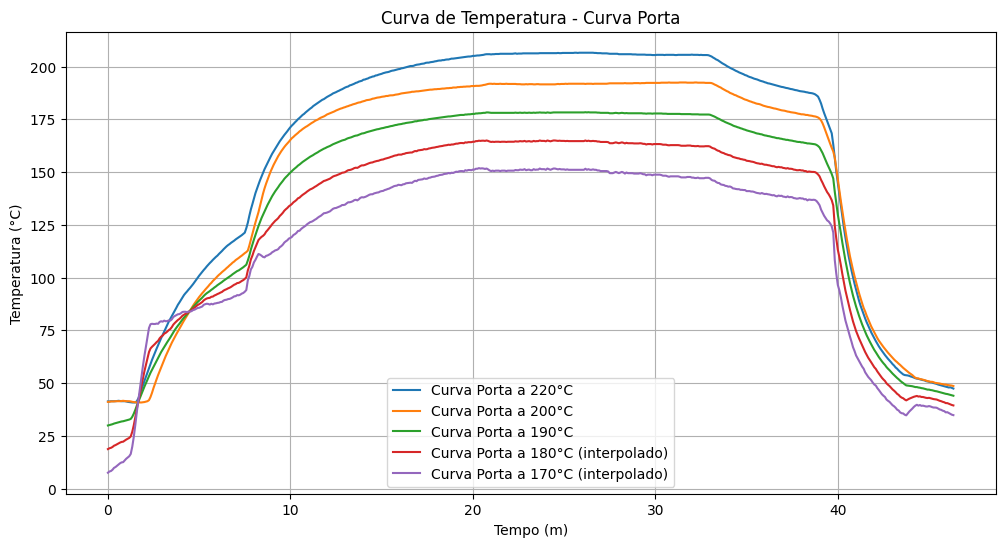

In [55]:
# Criar um modelo de interpolação para cada temperatura

models_porta = []
for temp in temps:
    col_name = f'Porta a {temp}°C'
    model1 = interp1d(data_porta['Tempo (m)'], data_porta[col_name], kind='cubic') #cubic interpolation
    models_porta.append((temp, model1))


# Tempo para predição (use o mesmo tempo que os dados originais)
times_porta = data_porta['Tempo (m)']


# Interpolação para a nova temperatura
# Note que aqui estamos interpolando as funções de interpolação
# para gerar a curva a 180 graus
# The original code was trying to interpolate a 1D function with a 2D array for y.
# This is incorrect. Instead, we need to interpolate each time point separately.
porta_180_1 = []
for time in times_porta:
    temp_interp_model_porta = interp1d([model1[0] for model1 in models_porta],
                                 [model1[1](time) for model1 in models_porta],
                                 kind='linear',
                                 bounds_error=False,
                                 fill_value="extrapolate")
    porta_180_1.append(temp_interp_model_porta (target_temp))

# Convert porta_180 to a NumPy array
porta_180_1 = np.array(porta_180_1)

porta_170_1 = []
for time in times_porta:
    temp_interp_model_porta = interp1d([model1[0] for model1 in models_porta],
                                 [model1[1](time) for model1 in models_porta],
                                 kind='linear',
                                 bounds_error=False,
                                 fill_value="extrapolate")
    porta_170_1.append(temp_interp_model_porta(target_temp_min))

# Convert porta_180 to a NumPy array
porta_170_1 = np.array(porta_170_1)

# Plotar a nova curva
plt.figure(figsize=(12, 6))
plt.plot(data_porta['Tempo (m)'], data_porta['Porta a 220°C'], label=f'{file_name_porta} a 220°C')
plt.plot(data_porta['Tempo (m)'], data_porta['Porta a 200°C'], label=f'{file_name_porta} a 200°C')
plt.plot(data_porta['Tempo (m)'], data_porta['Porta a 190°C'], label=f'{file_name_porta} a 190°C')
plt.plot(times_porta, porta_180_1, label=f'{file_name_porta} a {target_temp}°C (interpolado)')
plt.plot(times_porta, porta_170_1, label=f'{file_name_porta} a {target_temp_min}°C (interpolado)')
plt.xlabel('Tempo (m)')
plt.ylabel('Temperatura (°C)')
plt.title(f'Curva de Temperatura - {file_name_porta}')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# prompt: make a dataframe with times and porta_180

# Create a DataFrame with 'times' and 'porta_180'
df_interp_porta = pd.DataFrame({'Tempo (m)': times_porta, 'Porta a 180°C': porta_180_1, 'Porta a 170°C': porta_170_1})

df_interp_porta

# Juntar o dataset derivado com o dataset original
data_porta = pd.merge(data_porta, df_interp_porta, on='Tempo (m)', how='left')

data_porta.head()

,Segundos,Porta a 200°C,Porta a 220°C,Porta a 190°C,Tempo (m),Porta a 180°C,Porta a 170°C
0,0.00,41.1,41.3,29.9,0.000000,18.7,7.5
1,0.05,41.1,41.3,30.1,0.083333,19.1,8.1
2,0.10,41.3,41.4,30.3,0.166667,19.3,8.3
3,0.15,41.3,41.4,30.5,0.250000,19.7,8.9
4,0.20,41.3,41.4,30.8,0.333333,20.3,9.8


In [57]:
Temperatura_Minima_substrato = 140

# Encontrar os tempos em que a temperatura excede 160°C para cada curva
tempos_220_porta = len(data_porta.loc[data_porta['Porta a 220°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_200_porta = len(data_porta.loc[data_porta['Porta a 200°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_190_porta = len(data_porta.loc[data_porta['Porta a 190°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_deriv_porta = len(data_porta.loc[data_porta['Porta a 180°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_deriv_porta_min = len(data_porta.loc[data_porta['Porta a 170°C'] > Temperatura_Minima_substrato, 'Segundos'])*5

print(f"Número de tempos acima de 160°C para a curva de 220°C: {tempos_220_porta/60}")
print(f"Número de tempos acima de 160°C para a curva de 200°C: {tempos_200_porta/60}")
print(f"Número de tempos acima de 160°C para a curva de 190°C: {tempos_190_porta/60}")
print(f"Número de tempos acima de 160°C para a curva de {target_temp}°C: {tempos_deriv_porta/60}")
print(f"Número de tempos acima de 160°C para a curva de {target_temp}°C: {tempos_deriv_porta_min/60}")

Número de tempos acima de 160°C para a curva de 220°C: 31.916666666666668
Número de tempos acima de 160°C para a curva de 200°C: 31.583333333333332
Número de tempos acima de 160°C para a curva de 190°C: 30.75
Número de tempos acima de 160°C para a curva de 180°C: 28.666666666666668
Número de tempos acima de 160°C para a curva de 180°C: 21.083333333333332


In [58]:
# Criar um DataFrame vazio para armazenar os resultados
results_porta = pd.DataFrame(columns=['Temperatura', 'Tempo_220', 'Tempo_200', 'Tempo_180'])

# Iterar pelas temperaturas de 120 a 210 com intervalo de 5
for temp in range(120, 200, 1):
  # Calcular o tempo acima da temperatura para cada curva
  tempo_220_porta = len(data_porta.loc[data_porta['Porta a 220°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_200_porta = len(data_porta.loc[data_porta['Porta a 200°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_190_porta = len(data_porta.loc[data_porta['Porta a 190°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_der_porta = len(data_porta.loc[data_porta['Porta a 180°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_der_porta_min = len(data_porta.loc[data_porta['Porta a 170°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  # Adicionar os resultados ao DataFrame
  results_porta = pd.concat([results_porta, pd.DataFrame({'Temperatura': [temp], 'Tempo_220': [tempo_220_porta], 'Tempo_200': [tempo_200_porta], 'Tempo_190': [tempo_190_porta], 'Tempo_deriv': [tempo_der_porta], 'Tempo_deriv_min': [tempo_der_porta_min]})], ignore_index=True)

# Exibir o DataFrame
results_porta

<ipython-input-58-b4a283ae78ab>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_porta = pd.concat([results_porta, pd.DataFrame({'Temperatura': [temp], 'Tempo_220': [tempo_220_porta], 'Tempo_200': [tempo_200_porta], 'Tempo_190': [tempo_190_porta], 'Tempo_deriv': [tempo_der_porta], 'Tempo_deriv_min': [tempo_der_porta_min]})], ignore_index=True)


,Temperatura,Tempo_220,Tempo_200,Tempo_180,Tempo_190,Tempo_deriv,Tempo_deriv_min
0,120,33.083333,32.583333,NaN,32.166667,31.333333,29.666667
1,121,32.916667,32.500000,NaN,32.083333,31.250000,29.500000
2,122,32.833333,32.500000,NaN,32.000000,31.166667,29.333333
3,123,32.833333,32.416667,NaN,31.916667,31.083333,29.083333
4,124,32.666667,32.333333,NaN,31.916667,31.000000,29.000000
...,...,...,...,...,...,...,...
75,195,20.750000,0.000000,NaN,0.000000,0.000000,0.000000
76,196,20.083333,0.000000,NaN,0.000000,0.000000,0.000000
77,197,19.500000,0.000000,NaN,0.000000,0.000000,0.000000
78,198,18.833333,0.000000,NaN,0.000000,0.000000,0.000000


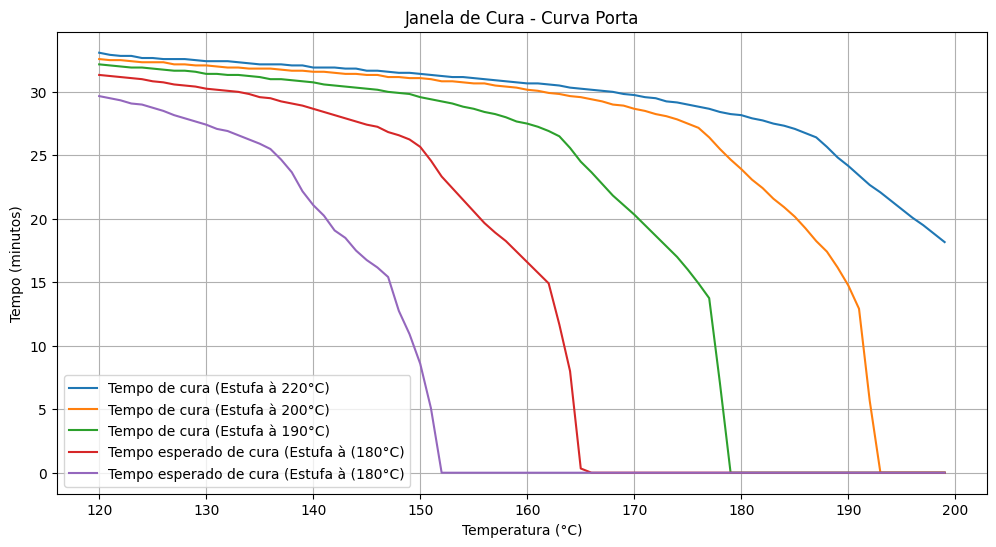

In [59]:
# Plotar os resultados em um único gráfico
plt.figure(figsize=(12, 6))
plt.plot(results_porta['Temperatura'], results_porta['Tempo_220'], label='Tempo de cura (Estufa à 220°C)')
plt.plot(results_porta['Temperatura'], results_porta['Tempo_200'], label='Tempo de cura (Estufa à 200°C)')
plt.plot(results_porta['Temperatura'], results_porta['Tempo_190'], label='Tempo de cura (Estufa à 190°C)')
plt.plot(results_porta['Temperatura'], results_porta['Tempo_deriv'], label=f'Tempo esperado de cura (Estufa à ({target_temp}°C)')
plt.plot(results_porta['Temperatura'], results_porta['Tempo_deriv_min'], label=f'Tempo esperado de cura (Estufa à ({target_temp}°C)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Tempo (minutos)')
plt.title(f'Janela de Cura - {file_name_porta}')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# prompt: mount google drive


# Curva para o expansível do teto


In [33]:

# Carregar os dados do arquivo
file_path_gela = drive_path + '/Cura Geladinho.txt'
file_name_gela = file_path_gela.split('/')[-1].split('.')[0]
data_gela = pd.read_csv(file_path_gela, delimiter='\t')
file_name_gela

'Cura Geladinho'

In [34]:
data_gela = data_gela.fillna(0)
data_gela.head()

,Segundos,Geladinho a 190°C,Geladinho a 200°C,Geladinho a 220°C
0,"0,00",31,31,31
1,"0,05",31,31,31
2,"0,10","31,1","31,1","31,1"
3,"0,15","31,1","31,1","31,1"
4,"0,20","31,1","31,1","31,1"


In [35]:
# Converter as colunas de temperatura para valores numéricos
try:
  # Check if the column is already numeric before applying str.replace
  if not pd.api.types.is_numeric_dtype(data_gela['Geladinho a 220°C']):
    data_gela['Geladinho a 220°C'] = pd.to_numeric(data_gela['Geladinho a 220°C'].str.replace(',', '.'))
  if not pd.api.types.is_numeric_dtype(data_gela['Geladinho a 200°C']):
    data_gela['Geladinho a 200°C'] = pd.to_numeric(data_gela['Geladinho a 200°C'].str.replace(',', '.'))
  if not pd.api.types.is_numeric_dtype(data_gela['Geladinho a 190°C']):
    data_gela['Geladinho a 190°C'] = pd.to_numeric(data_gela['Geladinho a 190°C'].str.replace(',', '.'))
  if not pd.api.types.is_numeric_dtype(data_gela['Segundos']):
    data_gela['Segundos'] = pd.to_numeric(data_gela['Segundos'].str.replace(',', '.'))
except ValueError:
    # Handle the error, for example, print an error message or skip the row
    print("Error converting to numeric. Check the data format.")

In [36]:
# prompt: adicione uma nova colunacom numeros inteiros originado da multiplicação   da coluna Segundos por 100

data_gela['Tempo (m)'] = data_gela['Segundos'] * 100/60
data_gela.head()

,Segundos,Geladinho a 190°C,Geladinho a 200°C,Geladinho a 220°C,Tempo (m)
0,0.00,31.0,31.0,31.0,0.000000
1,0.05,31.0,31.0,31.0,0.083333
2,0.10,31.1,31.1,31.1,0.166667
3,0.15,31.1,31.1,31.1,0.250000
4,0.20,31.1,31.1,31.1,0.333333


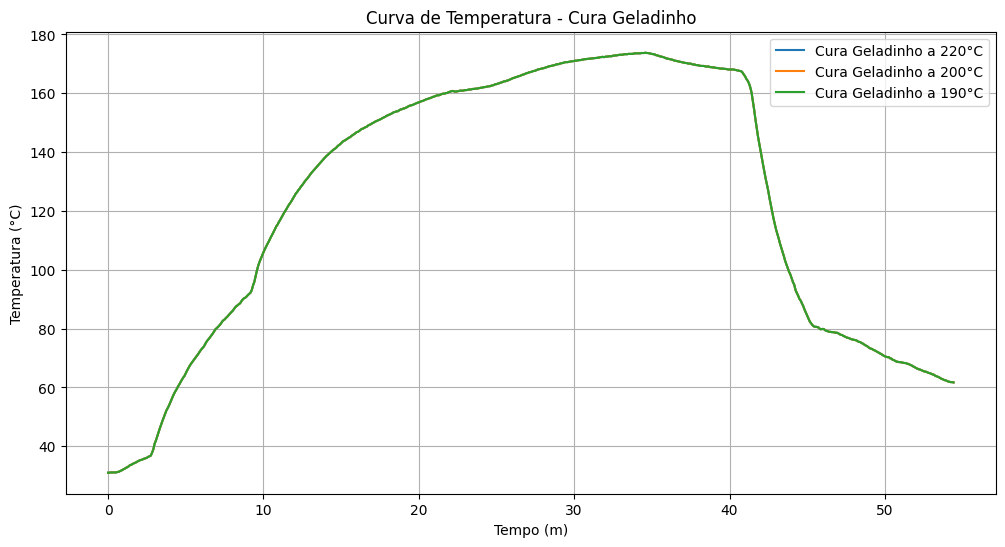

In [37]:
# Plotar as curvas de temperatura
plt.figure(figsize=(12, 6))
plt.plot(data_gela['Tempo (m)'], data_gela['Geladinho a 220°C'], label=f'{file_name_gela} a 220°C')
plt.plot(data_gela['Tempo (m)'], data_gela['Geladinho a 200°C'], label=f'{file_name_gela} a 200°C')
plt.plot(data_gela['Tempo (m)'], data_gela['Geladinho a 190°C'], label=f'{file_name_gela} a 190°C')
plt.xlabel('Tempo (m)')
plt.ylabel('Temperatura (°C)')
plt.title(f'Curva de Temperatura - {file_name_gela}')
plt.legend()
plt.grid(True)

In [38]:
data_gela.head()


,Segundos,Geladinho a 190°C,Geladinho a 200°C,Geladinho a 220°C,Tempo (m)
0,0.00,31.0,31.0,31.0,0.000000
1,0.05,31.0,31.0,31.0,0.083333
2,0.10,31.1,31.1,31.1,0.166667
3,0.15,31.1,31.1,31.1,0.250000
4,0.20,31.1,31.1,31.1,0.333333


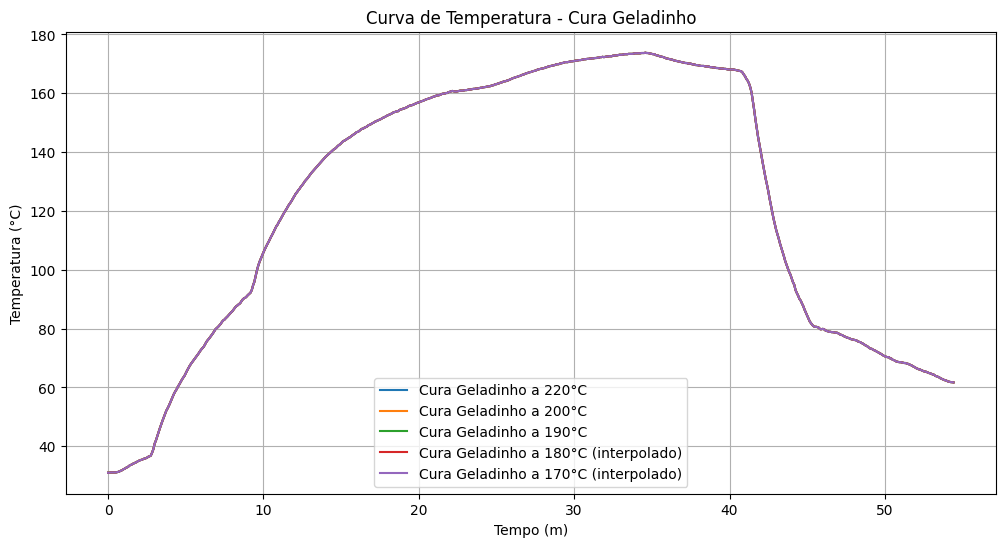

In [39]:
# prompt: temos tres curvas para um processo que está atrelado á uma variavel fixa, que é a temperatura interna da estufa. com uma temperatura de 220ºC temos a curva da coluna "Porta a 220°C". Para uma temperatura da estufa de 200°C a curva real está na coluna "Porta a 200°C" e para uma temperatura de 190°C temos a curva real que está na coluna "Porta a 190°C. Preciso de uma curva derivada desse modelo para gerar uma nova curva com a alteração do parâmetro de temperatura da estufa, a exemplo: quando a estufa estiver em 180°C, qual será a temperatura da porta?


# Criar um modelo de interpolação para cada temperatura
temps = [190, 200, 220]
modelg = []
for temp in temps:
    col_name = f'Geladinho a {temp}°C'
    model2 = interp1d(data_gela['Tempo (m)'], data_gela[col_name], kind='cubic') #cubic interpolation
    modelg.append((temp, model2))


# Temperatura alvo
target_temp = 180

# Tempo para predição (use o mesmo tempo que os dados originais)
times = data_gela['Tempo (m)']


# Interpolação para a nova temperatura
# Note que aqui estamos interpolando as funções de interpolação
# para gerar a curva a 180 graus
# The original code was trying to interpolate a 1D function with a 2D array for y.
# This is incorrect. Instead, we need to interpolate each time point separately.
porta_180 = []
for time in times:
    temp_interp_model = interp1d([model2[0] for model2 in modelg],
                                 [model2[1](time) for model2 in modelg],
                                 kind='linear',
                                 bounds_error=False,
                                 fill_value="extrapolate")
    porta_180.append(temp_interp_model(target_temp))

# Convert porta_180 to a NumPy array
porta_180 = np.array(porta_180)

target_temp_min = 170

porta_170 = []
for time in times:
    temp_interp_model = interp1d([model2[0] for model2 in modelg],
                                 [model2[1](time) for model2 in modelg],
                                 kind='linear',
                                 bounds_error=False,
                                 fill_value="extrapolate")
    porta_170.append(temp_interp_model(target_temp_min))

# Convert porta_180 to a NumPy array
porta_170 = np.array(porta_170)

# Plotar a nova curva
plt.figure(figsize=(12, 6))
plt.plot(data_gela['Tempo (m)'], data_gela['Geladinho a 220°C'], label=f'{file_name_gela} a 220°C')
plt.plot(data_gela['Tempo (m)'], data_gela['Geladinho a 200°C'], label=f'{file_name_gela} a 200°C')
plt.plot(data_gela['Tempo (m)'], data_gela['Geladinho a 190°C'], label=f'{file_name_gela} a 190°C')
plt.plot(times, porta_180, label=f'{file_name_gela} a {target_temp}°C (interpolado)')
plt.plot(times, porta_170, label=f'{file_name_gela} a {target_temp_min}°C (interpolado)')
plt.xlabel('Tempo (m)')
plt.ylabel('Temperatura (°C)')
plt.title(f'Curva de Temperatura - {file_name_gela}')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# prompt: make a dataframe with times and porta_180

# Create a DataFrame with 'times' and 'porta_180'
df_interp = pd.DataFrame({'Tempo (m)': times, 'Geladinho a 180°C': porta_180, 'Geladinho a 170°C': porta_170})

df_interp

,Tempo (m),Geladinho a 180°C,Geladinho a 170°C
0,0.000000,31.0,31.0
1,0.083333,31.0,31.0
2,0.166667,31.1,31.1
3,0.250000,31.1,31.1
4,0.333333,31.1,31.1
...,...,...,...
649,54.083333,62.0,62.0
650,54.166667,61.9,61.9
651,54.250000,61.8,61.8
652,54.333333,61.8,61.8


In [41]:
# Juntar o dataset derivado com o dataset original
data_gela = pd.merge(data_gela, df_interp, on='Tempo (m)', how='left')

data_gela.head()

,Segundos,Geladinho a 190°C,Geladinho a 200°C,Geladinho a 220°C,Tempo (m),Geladinho a 180°C,Geladinho a 170°C
0,0.00,31.0,31.0,31.0,0.000000,31.0,31.0
1,0.05,31.0,31.0,31.0,0.083333,31.0,31.0
2,0.10,31.1,31.1,31.1,0.166667,31.1,31.1
3,0.15,31.1,31.1,31.1,0.250000,31.1,31.1
4,0.20,31.1,31.1,31.1,0.333333,31.1,31.1


In [50]:
Temperatura_Minima_substrato = 164

# Encontrar os tempos em que a temperatura excede 160°C para cada curva
tempos_220_gela = len(data_gela.loc[data_gela['Geladinho a 220°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_200_gela = len(data_gela.loc[data_gela['Geladinho a 200°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_190_gela = len(data_gela.loc[data_gela['Geladinho a 190°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_deriv_gela = len(data_gela.loc[data_gela['Geladinho a 180°C'] > Temperatura_Minima_substrato, 'Segundos'])*5
tempos_deriv_min_gela = len(data_gela.loc[data_gela['Geladinho a 170°C'] > Temperatura_Minima_substrato, 'Segundos'])*5

print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de 220°C: {tempos_220_gela/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de 200°C: {tempos_200_gela/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de 190°C: {tempos_200_gela/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de {target_temp}°C: {tempos_deriv_gela/60}")
print(f"Número de tempos acima de {Temperatura_Minima_substrato}°C para a curva de {target_temp_min}°C: {tempos_deriv_min_gela/60}")

Número de tempos acima de 164°C para a curva de 220°C: 15.75
Número de tempos acima de 164°C para a curva de 200°C: 15.75
Número de tempos acima de 164°C para a curva de 190°C: 15.75
Número de tempos acima de 164°C para a curva de 180°C: 15.75
Número de tempos acima de 164°C para a curva de 170°C: 15.75


In [46]:
# prompt: para as variaveis tempos_220 e tempos_200, crie uma tabela onde mostre quanto tempo cada variavel ficou acima da temperatura, varie a temperatura de 120 até 210 com intervalo de 5 graus

# Criar um DataFrame vazio para armazenar os resultados
results_gela = pd.DataFrame(columns=['Temperatura', 'Tempo_220', 'Tempo_200', 'Tempo_180'])

# Iterar pelas temperaturas de 120 a 210 com intervalo de 5
for temp in range(120, 200, 1):
  # Calcular o tempo acima da temperatura para cada curva
  tempo_220_gela = len(data_gela.loc[data_gela['Geladinho a 220°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_200_gela = len(data_gela.loc[data_gela['Geladinho a 200°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_190_gela = len(data_gela.loc[data_gela['Geladinho a 190°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_der_gela = len(data_gela.loc[data_gela['Geladinho a 180°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  tempo_der_min_gela = len(data_gela.loc[data_gela['Geladinho a 170°C'] > temp, 'Segundos']) * 5 / 60 # em minutos
  # Adicionar os resultados ao DataFrame
  results_gela = pd.concat([results_gela, pd.DataFrame({'Temperatura': [temp], 'Tempo_220': [tempo_220_gela], 'Tempo_200': [tempo_200_gela], 'Tempo_190': [tempo_190_gela], 'Tempo_deriv': [tempo_der_gela], 'Tempo_deriv_min': [tempo_der_min_gela]})], ignore_index=True)

# Exibir o DataFrame
results_gela

<ipython-input-46-16dbb194731a>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_gela = pd.concat([results_gela, pd.DataFrame({'Temperatura': [temp], 'Tempo_220': [tempo_220_gela], 'Tempo_200': [tempo_200_gela], 'Tempo_190': [tempo_190_gela], 'Tempo_deriv': [tempo_der_gela], 'Tempo_deriv_min': [tempo_der_min_gela]})], ignore_index=True)


,Temperatura,Tempo_220,Tempo_200,Tempo_180,Tempo_190,Tempo_deriv,Tempo_deriv_min
0,120,31.333333,31.333333,NaN,31.333333,31.333333,31.333333
1,121,31.166667,31.166667,NaN,31.166667,31.166667,31.166667
2,122,31.000000,31.000000,NaN,31.000000,31.000000,31.000000
3,123,30.833333,30.833333,NaN,30.833333,30.833333,30.833333
4,124,30.750000,30.750000,NaN,30.750000,30.750000,30.750000
...,...,...,...,...,...,...,...
75,195,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
76,196,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
77,197,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
78,198,0.000000,0.000000,NaN,0.000000,0.000000,0.000000


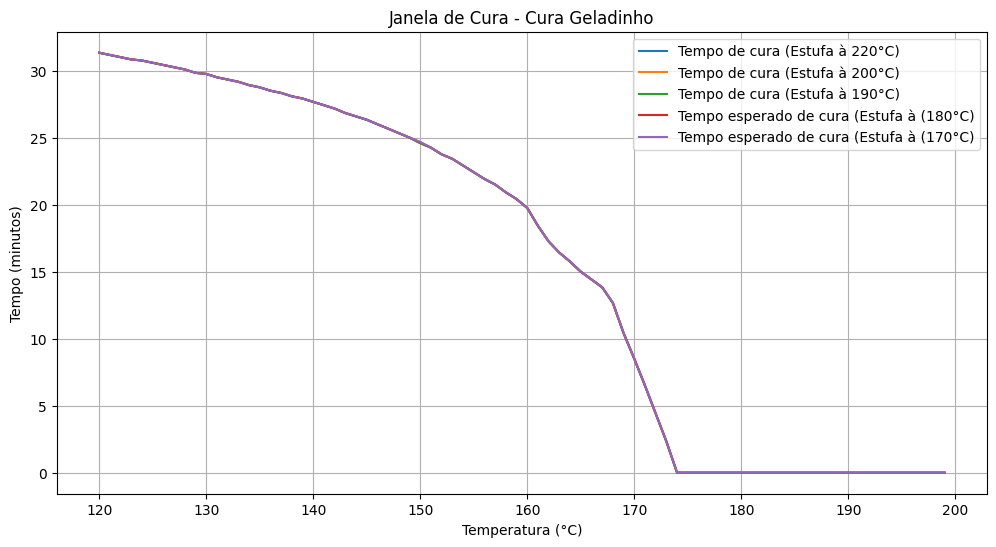

In [49]:
# Plotar os resultados em um único gráfico
plt.figure(figsize=(12, 6))
plt.plot(results_gela['Temperatura'], results_gela['Tempo_220'], label='Tempo de cura (Estufa à 220°C)')
plt.plot(results_gela['Temperatura'], results_gela['Tempo_200'], label='Tempo de cura (Estufa à 200°C)')
plt.plot(results_gela['Temperatura'], results_gela['Tempo_190'], label='Tempo de cura (Estufa à 190°C)')
plt.plot(results_gela['Temperatura'], results_gela['Tempo_deriv'], label=f'Tempo esperado de cura (Estufa à ({target_temp}°C)')
plt.plot(results_gela['Temperatura'], results_gela['Tempo_deriv_min'], label=f'Tempo esperado de cura (Estufa à ({target_temp_min}°C)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Tempo (minutos)')
plt.title(f'Janela de Cura - {file_name_gela}')
plt.legend()
plt.grid(True)

plt.show()